## Data Wrangling & EDA for Home Price Predictor Capstone<a id='Data_Wrangling_&_EDA_for_Home_Price_Predictor_Capstone'></a>

   ## 1.1 Contents<a id='2.1_Contents'></a>
* [Data Wrangling & EDA for Home Price Predictor Capstone](#Data_Wrangling_&_EDA_for_Home_Price_Predictor_Capstone)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
  * [1.2.1 Recap Of Data Science Problem](#1.2.1_Recap_Of_Data_Science_Problem)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Objectives](#1.4_Objectives)
  * [1.5 Load The Housing Data](#1.5_Load_The_Housing_Data)
    * [1.5.1 Clean the Housing Data](#1.5.1_Clean_the_Housing_Data)
    * [1.5.2 Adding Rows](#1.5.2_Adding_Rows)
    * [1.5.3 Rearrange Columns](#1.5.3_Rearrange_Columns)
  * [1.6 Explore the Data Columns](#1.6_Explore_the_Data_Columns)
    * [1.6.1 Price Column](#1.6.1_Price_Column)
    * [1.6.2 Date Column](#1.6.2_Date_Column)
    * [1.6.3 Bedrooms Column](#1.6.3_Bedrooms_Column)
    * [1.6.4 Bathrooms Column](#1.6.4_Bathrooms_Column)
    * [1.6.5 Bed/Bath % Column](#1.6.5_Bed/Bath_%_Column)
    * [1.6.6 Year Built Column](#1.6.6_Year_Built_Column)
    * [1.6.7 Age Column](#1.6.7_Age_Column)
    * [1.6.8 Sqft Living Column](#1.6.8_Sqft_Living_Column)
    * [1.6.9 T Test for Condition, View and Waterfront Columns](#1.6.9_T_Test_for_Condition,_View_and_Waterfront_Columns)
    * [2. Summary](#2._Summary) 

## 1.2 Introduction<a id='1.2_Introduction'></a>

This section is about organizing the housing data for exploratory data analysis. Doing this will help imensely in the future to create our model. Data cleaning and understanding our variables will be done at this stage. Conducting graphs and visualizations will also be done to comprehend what correlations we have.

### 1.2.1 Recap Of Data Science Problem<a id='1.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to evaluate the price of a house with the different variables. A real estate company needs help in assessing the price of home for their clients who want to know the value of their home or buy/sell a home. For many people purchasing a home is the biggest investment they will make in their lifetime. Helping clients understand the price of a home can help them make sound decision. This could potentially help a real estate company gain an competitive advantage over other firms in the industry.

# 1.3 Imports<a id='1.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1.4 Objectives<a id='1.4_Objectives'></a>

There are four objectives:

1. Do we think we have the correct data for our desired question?

2. Have we identified the required target value of price?

3. Do we have features that are potentially useful?

4. Are there fundamental issues with the data?

## 1.5 Load The Housing Data<a id='1.5_Load_The_Housing_Data'></a>

In [2]:
df= pd.read_csv('data.csv')

Lets look at this dataset:

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

It looks good that there are no missing values. Lets make sure the column values are appropriate for the data set and do some cleaning.

### 1.5.1 Clean the Housing Data<a id='1.5.1_Clean_the_Housing_Data'></a>

First we will change the 'Date' column into an actual datetime.

In [6]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [7]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


Looks good! Now lets drop the column "statezip" and create a "state" and "zipcode" column so we can have more variables for our model.

In [8]:
df[["state", "zip code"]] = df["statezip"].str.split(expand=True)
del df['statezip']

In [9]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,country,state,zip code
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,USA,WA,98133
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,USA,WA,98119
2,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,USA,WA,98042


### 1.5.2 Adding Rows<a id='1.5.2_Adding_Rows'></a>

Lets add a bedroom to bathroom ratio as an other variable.

In [10]:
#create bedroom to bathroom %
df['bd/ba %'] = df['bedrooms'] / df['bathrooms'] 
df['bd/ba %'] = round(df['bd/ba %'],3)

Lets add age of the home.

In [11]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [12]:
df['age'] = df['year'] - df['yr_built']

In [13]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,country,state,zip code,bd/ba %,year,age
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,USA,WA,98133,2.000,2014,59
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,Seattle,USA,WA,98119,2.000,2014,93
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,USA,WA,98042,1.500,2014,48
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,USA,WA,98008,1.333,2014,51
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,USA,WA,98052,1.600,2014,38


### 1.5.3 Rearrange Columns<a id='1.5.3_Rearrange_Columns'></a>

Lets rearrange the columns to make it look nice and put relavant columns next to each other.

In [14]:
df = df[['date', 'price', 'bedrooms', 'bathrooms', 'bd/ba %', 'age','yr_built', 'sqft_above', 
         'sqft_basement', 'sqft_living', 'sqft_lot', 'floors','view', 'waterfront', 'condition', 'yr_renovated', 'street', 'city', 
          'state', 'zip code', 'country']]

In [15]:
df.head()

,date,price,bedrooms,bathrooms,bd/ba %,age,yr_built,sqft_above,sqft_basement,sqft_living,...,floors,view,waterfront,condition,yr_renovated,street,city,state,zip code,country
0,2014-05-02,313000.0,3.0,1.50,2.000,59,1955,1340,0,1340,...,1.5,0,0,3,2005,18810 Densmore Ave N,Shoreline,WA,98133,USA
1,2014-05-02,2384000.0,5.0,2.50,2.000,93,1921,3370,280,3650,...,2.0,4,0,5,0,709 W Blaine St,Seattle,WA,98119,USA
2,2014-05-02,342000.0,3.0,2.00,1.500,48,1966,1930,0,1930,...,1.0,0,0,4,0,26206-26214 143rd Ave SE,Kent,WA,98042,USA
3,2014-05-02,420000.0,3.0,2.25,1.333,51,1963,1000,1000,2000,...,1.0,0,0,4,0,857 170th Pl NE,Bellevue,WA,98008,USA
4,2014-05-02,550000.0,4.0,2.50,1.600,38,1976,1140,800,1940,...,1.0,0,0,4,1992,9105 170th Ave NE,Redmond,WA,98052,USA


## 1.6 Explore the Data Columns<a id='1.6_Explore_the_Data_Columns'></a>

Lets checkout the mean, std, etc. of each column and explore columns that have potentially have a high correlation with the price variable.

In [16]:
df.describe()

,price,bedrooms,bathrooms,bd/ba %,age,yr_built,sqft_above,sqft_basement,sqft_living,sqft_lot,floors,view,waterfront,condition,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4598.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,1.722313,43.213696,1970.786304,1827.265435,312.081522,2139.346957,1.485252e+04,1.512065,0.240652,0.007174,3.451739,808.608261
std,5.638347e+05,0.908848,0.783781,0.624377,29.731848,29.731848,862.168977,464.137228,963.206916,3.588444e+04,0.538288,0.778405,0.084404,0.677230,979.414536
min,0.000000e+00,0.000000,0.000000,0.444000,0.000000,1900.000000,370.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1.333000,17.000000,1951.000000,1190.000000,0.000000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1.600000,38.000000,1976.000000,1590.000000,0.000000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2.000000,63.000000,1997.000000,2300.000000,610.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,6.000000,114.000000,2014.000000,9410.000000,4820.000000,13540.000000,1.074218e+06,3.500000,4.000000,1.000000,5.000000,2014.000000


Lets see the correlation between all the variables:

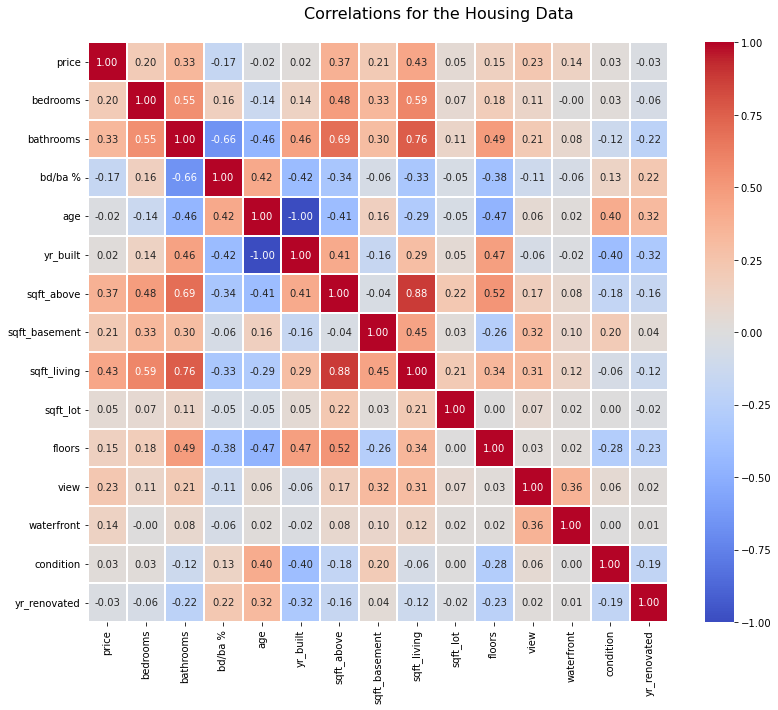

In [17]:
corrmat= df.corr()
f, ax = plt.subplots(figsize= (13,10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f', linewidths=.05)
f.subplots_adjust(top=.93)
t= f.suptitle('Correlations for the Housing Data', fontsize=16)

* Square feet of living and square feet above are related at .88
* Square living space and bathrooms have a high correlation at .76
* Square living space above and bathrooms also have a high correlation at .69


* Bed to bath ratio does not have a high correlation with bathrooms  at -.66

### Pair Plot of all the Columns

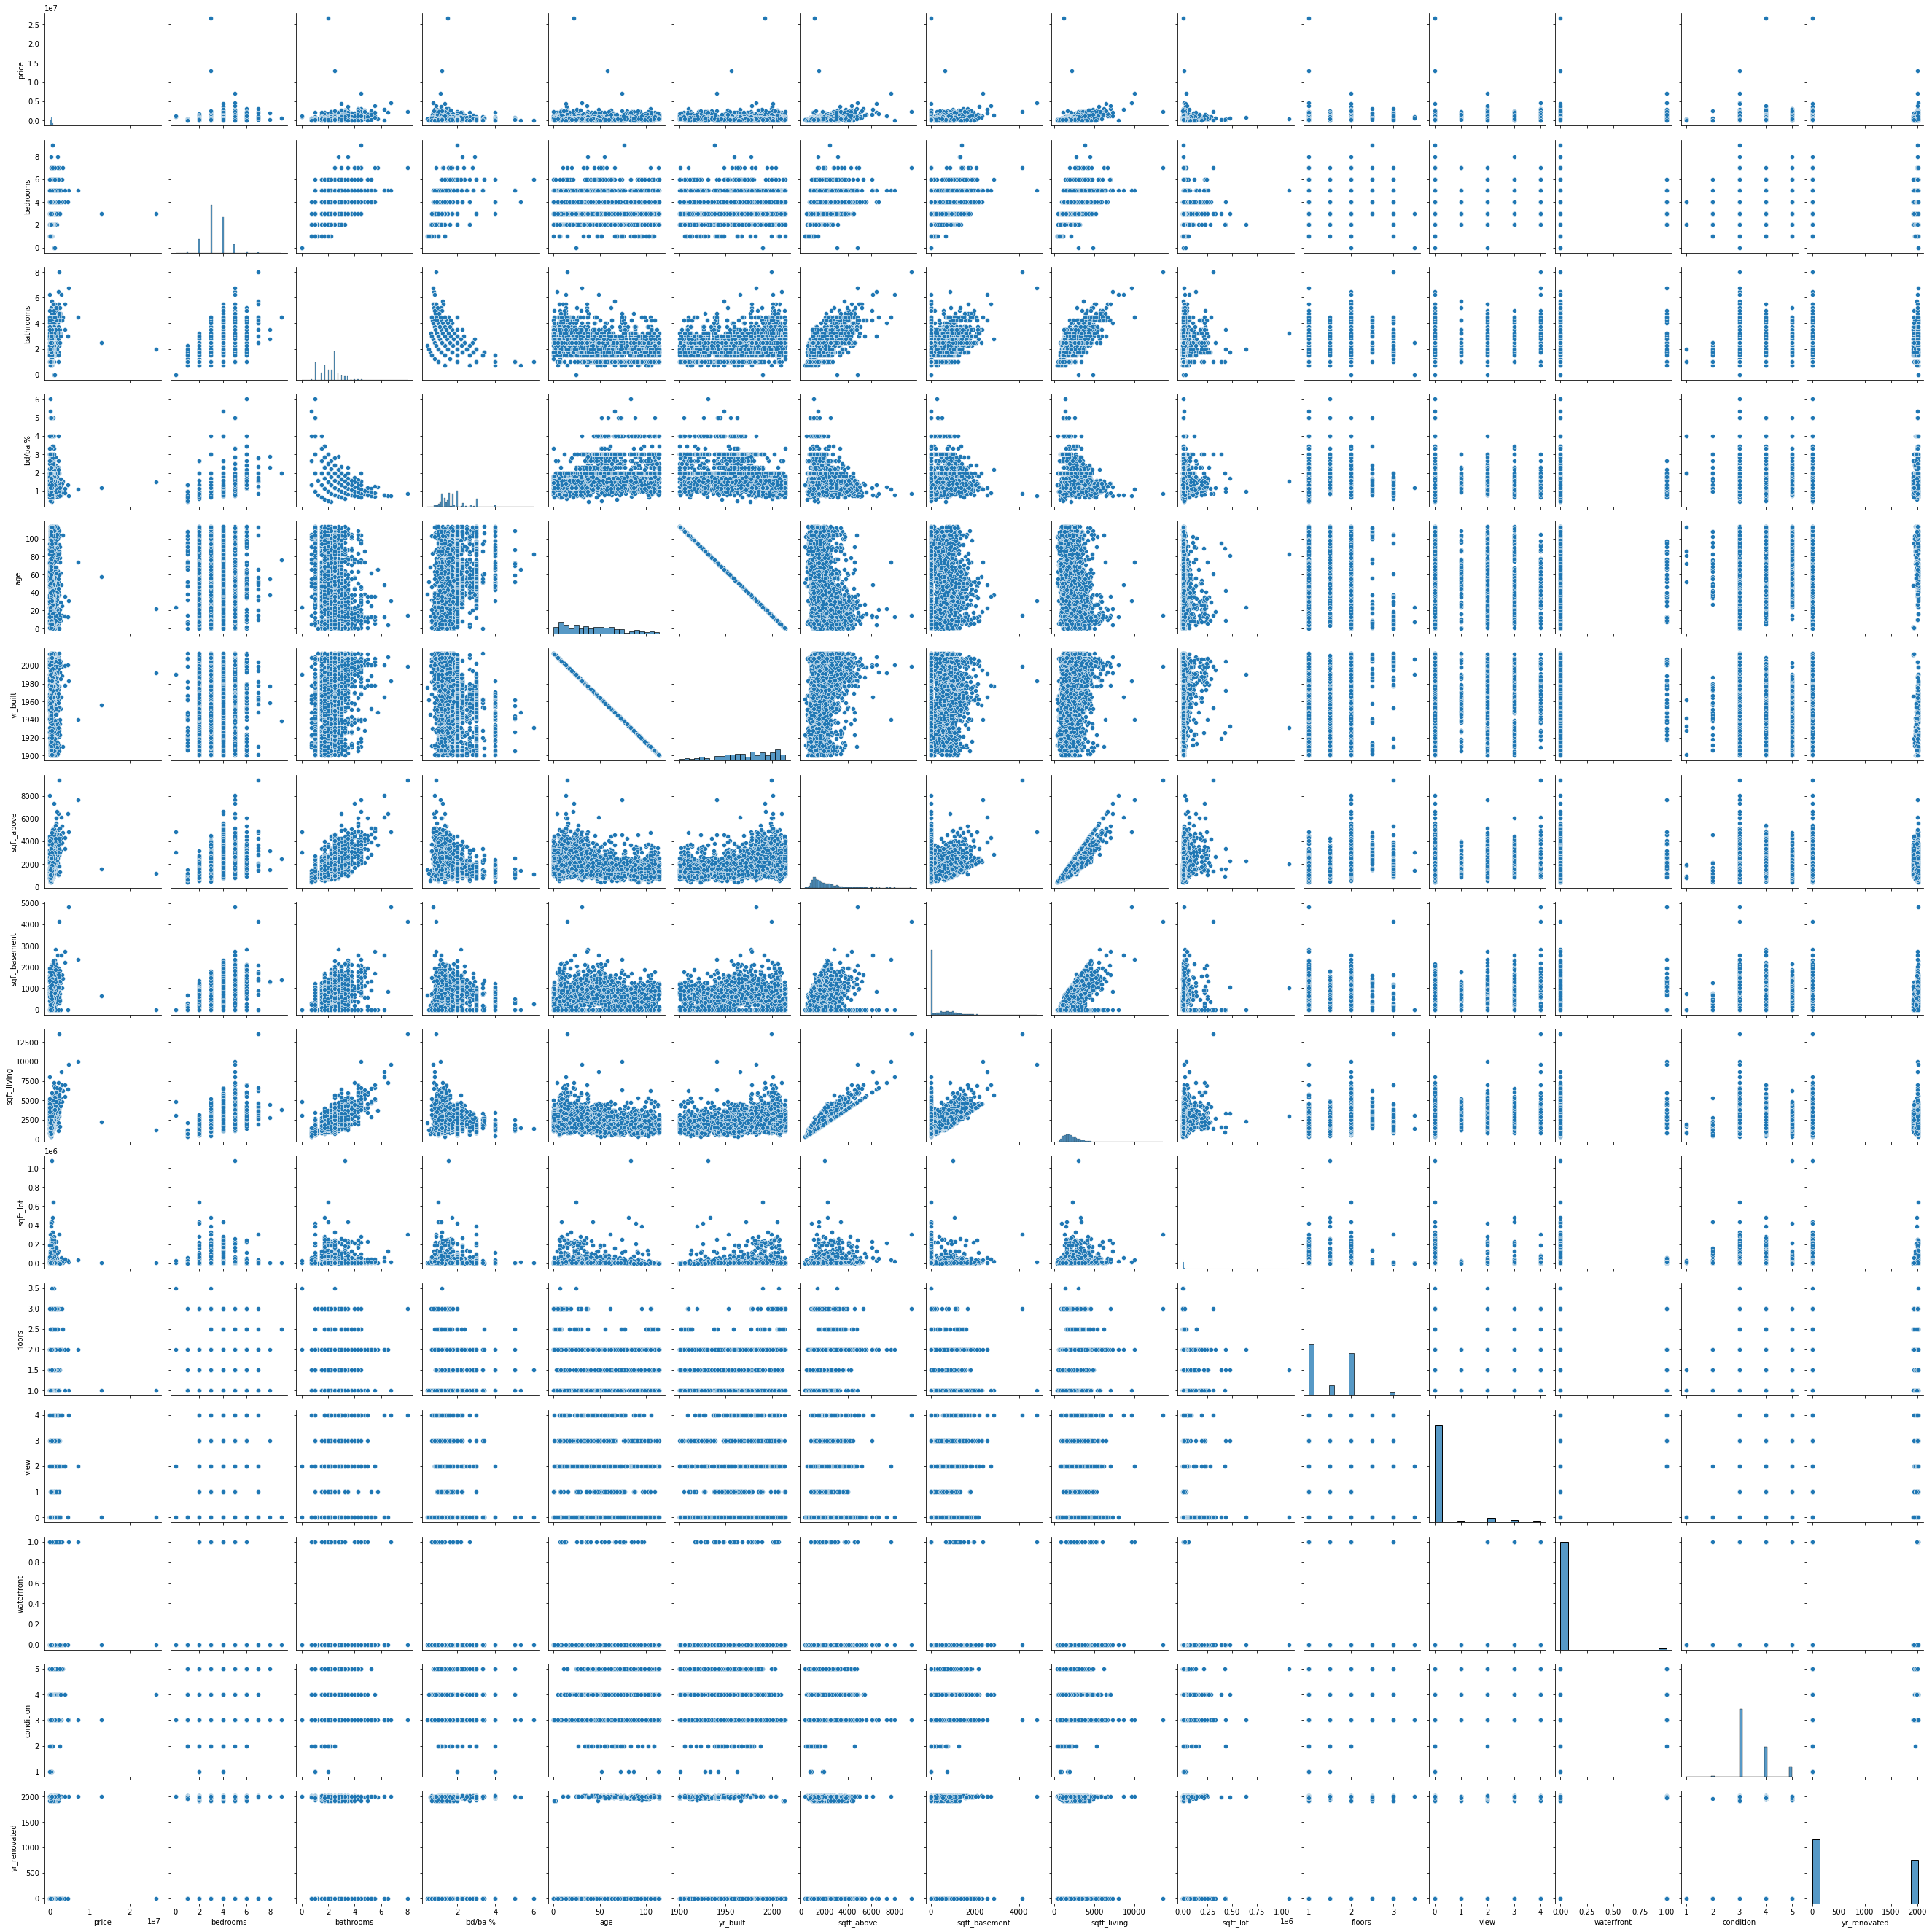

In [18]:
sns.pairplot(df, palette='set1')
plt.show()

### 1.6.1 Price Column<a id='1.6.1_Price_Column'></a>

In [18]:
df['price'].value_counts().head()

0.0         49
300000.0    42
400000.0    31
440000.0    29
450000.0    29
Name: price, dtype: int64

Looks as if there is a wide distrubtion of sale prices which will help to predict the price of a certain home.

In [19]:
df.loc[df['price']==0].head()

,date,price,bedrooms,bathrooms,bd/ba %,age,yr_built,sqft_above,sqft_basement,sqft_living,...,floors,view,waterfront,condition,yr_renovated,street,city,state,zip code,country
4354,2014-05-05,0.0,3.0,1.75,1.714,52,1962,1490,0,1490,...,1.0,0,0,4,0,3911 S 328th St,Federal Way,WA,98001,USA
4356,2014-05-05,0.0,4.0,2.75,1.455,54,1960,1300,1300,2600,...,1.0,0,0,4,2001,2120 31st Ave W,Seattle,WA,98199,USA
4357,2014-05-05,0.0,6.0,2.75,2.182,61,1953,1600,1600,3200,...,1.0,2,0,4,1983,12271 Marine View Dr SW,Burien,WA,98146,USA
4358,2014-05-06,0.0,5.0,3.50,1.429,31,1983,2490,990,3480,...,2.0,0,0,4,0,21809 SE 38th Pl,Issaquah,WA,98075,USA
4361,2014-05-07,0.0,5.0,1.50,3.333,94,1920,760,740,1500,...,1.0,0,0,5,0,14901-14999 12th Ave SW,Burien,WA,98166,USA


These could be a sale where it was between family members. We will explore what to do with these rows in a later section.

Text(0.5, 0, 'Different Price Points')

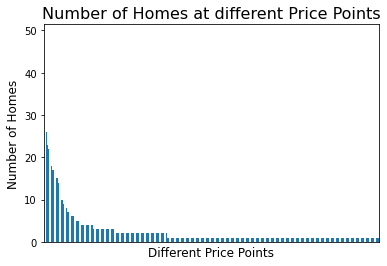

In [81]:
p= df['price'].value_counts().plot(kind='bar')
p.set_title('# of Homes at different Price Points', fontsize=16)
p.set_xticks([])
p.set_ylabel('Number of Homes', fontsize=12)
p.set_xlabel('Different Price Points', fontsize=12)

The number of homes sold decreases as the price increases. There are less expensive homes in our data set than cheaper.

In [21]:
bedroom_price_means = df.groupby(by='bedrooms')['price'].mean().sort_values(ascending=False)
bedroom_price_means

bedrooms
0.0    1.195324e+06
8.0    1.155000e+06
7.0    1.049429e+06
6.0    8.173628e+05
5.0    7.701860e+05
4.0    6.351194e+05
9.0    5.999990e+05
3.0    4.886130e+05
2.0    3.916219e+05
1.0    2.740763e+05
Name: price, dtype: float64

Homes with zero bedrooms were probably mansions used for parties and special events. A nine bedroom home was worth on average less than a five or a four bedroom place.

In [22]:
age_price_means = df.groupby(by='age')['price'].mean().sort_values(ascending=False)
age_price_means.head()

age
22    1.267580e+06
77    9.272188e+05
78    9.185000e+05
79    9.143333e+05
80    8.817500e+05
Name: price, dtype: float64

Looks as if the homes built in 1992 were on average expensive. Possibily from a new housing development or expensive neighborhood. This is an interesting correlation that will help us a paint a picture with the data.

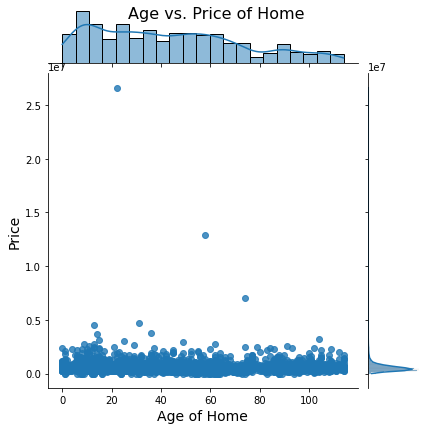

In [86]:
ap=sns.jointplot(x='age', y='price', data=df, kind='reg')
ap.fig.suptitle('Age vs. Price of Home', fontsize=16)
ap.set_axis_labels('Age of Home', 'Price', fontsize=14)

There are a few outliers where the price of the home was very expensive compared to other homes bulit in that same year.

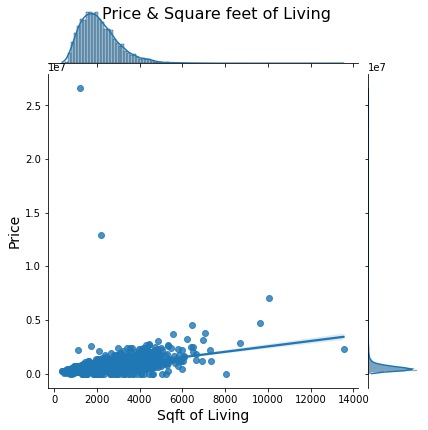

In [89]:
sp = sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
sp.fig.suptitle('Price & Square feet of Living', fontsize=16)
sp.set_axis_labels('Sqft of Living', 'Price', fontsize=14)

This has a positive correlation between these two variables. There was one home were the square feet of living space was under 2,000 sqft and was very expensive. Overall the data is very consistant which will help to predict the price of a home.

Text(0.5, 0, 'Year Built')

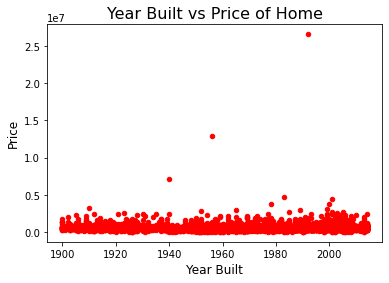

In [88]:
yp=df.plot(kind ='scatter', x='yr_built', y='price', color='red')
yp.set_title('Year Built vs Price of Home', fontsize=16)
yp.set_ylabel('Price', fontsize=12)
yp.set_xlabel('Year Built', fontsize=12)

A few outliers but almost evenly distribution of prices throughout the years of the homes being built. There is one outlier home that was built in the 1990s that was very expensive.

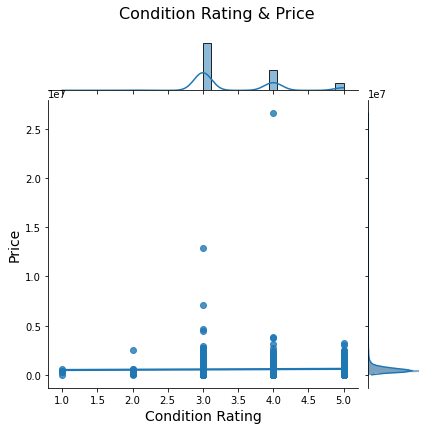

In [92]:
cp = sns.jointplot(x='condition', y='price', data=df, kind='reg')
cp.fig.subplots_adjust(top=.9)
cp.fig.suptitle('Condition Rating & Price', fontsize=16)
cp.set_axis_labels('Condition Rating', 'Price', fontsize=14)

This graph shows that that condition and price are positively skewed. Most of the homes have a condition rating of 4 and not many homes have a rating of 1.

In [27]:
min_quantile, max_quantile = df.price.quantile([0.01, 0.999])
min_quantile, max_quantile

(0.0, 4076289.0000005164)

Homes over $4,076,289 are in the .999 quantile.

In [28]:
df[df.price > max_quantile]

,date,price,bedrooms,bathrooms,bd/ba %,age,yr_built,sqft_above,sqft_basement,sqft_living,...,floors,view,waterfront,condition,yr_renovated,street,city,state,zip code,country
2286,2014-06-11,7062500.0,5.0,4.50,1.111,74,1940,7680,2360,10040,...,2.0,2,1,3,2001,4442 95th Ave NE,Bellevue,WA,98004,USA
2654,2014-06-17,4668000.0,5.0,6.75,0.741,31,1983,4820,4820,9640,...,1.0,4,1,3,2009,5044 Butterworth Rd,Mercer Island,WA,98040,USA
2761,2014-06-18,4489000.0,4.0,3.00,1.333,13,2001,6430,0,6430,...,2.0,0,0,3,0,1149-1199 91st Ave NE,Bellevue,WA,98004,USA
4346,2014-06-23,12899000.0,3.0,2.50,1.200,58,1956,1550,640,2190,...,1.0,0,0,3,2001,5426 40th Ave W,Seattle,WA,98199,USA
4350,2014-07-03,26590000.0,3.0,2.00,1.500,22,1992,1180,0,1180,...,1.0,0,0,4,0,12005 SE 219th Ct,Kent,WA,98031,USA


Looks as if their are only five homes that are very expensive above the .999 quantile.

In [29]:
df1 = df[(df.price<max_quantile) & (df.price>min_quantile)]
df1.shape

(4546, 21)

Most of the homes are within the .01 and .999 quantile thresolds.

Text(0.5, 1.0, '# of Homes at different Price Points')

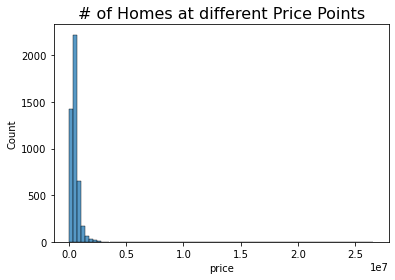

In [93]:
price= sns.histplot(df.price, bins=75)
price.set_title('# of Homes at different Price Points', fontsize=16)

A majority of the homes are within 0.0-.25 le7 price range.

### 1.6.2 Date Column<a id='1.6.2_Date_Column'></a>

In [31]:
df['date'].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2014-07-09    121
             ... 
2014-06-07      4
2014-07-06      3
2014-07-04      2
2014-05-11      2
2014-05-17      1
Name: date, Length: 70, dtype: int64

70 unique dates in the year. Many homes were sold on June 23rd and 25th in 2014.

In [32]:
df.date.min()

datetime.date(2014, 5, 2)

In [33]:
df.date.max()

datetime.date(2014, 7, 10)

Two months and eight days worth of data.

In [99]:
date_price_means = df.groupby(by='date')['price'].mean().sort_values(ascending=False)
date_price_means.head(5)

date
2014-07-03    977023.091657
2014-07-05    873333.333333
2014-06-08    723218.000000
2014-07-06    709930.000000
2014-05-24    689109.090909
Name: price, dtype: float64

The most expensive date for sales of homes was on July 3rd 2014. Then a few days later on July 5th was the second most. So even though many homes did not sell towards the end the data there was more money envolved with these smaller number of sales.

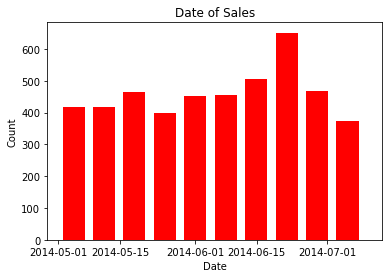

In [105]:
plt.hist(df['date'], color='red', width= 5)
plt.title('Date of Sales')
plt.ylabel('Count')
plt.xlabel('Date')
plt.show()

The most sales in one day was in the third week of June. Normally there is more home sales in the summer.

Text(0.5, 1.0, 'Date vs. Sqft of Living')

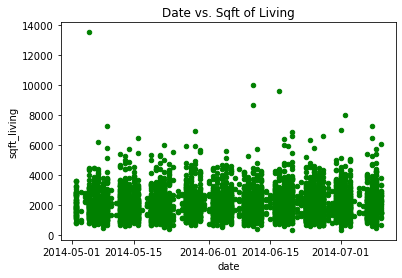

In [106]:
ds=df.plot(kind ='scatter', x='date', y='sqft_living', color='green')
ds.set_title('Date vs. Sqft of Living')

Almost evenly distributed  between the time and sqft of living space. The biggest place was sold in early May.

Text(0.5, 1.0, 'Date & Condition')

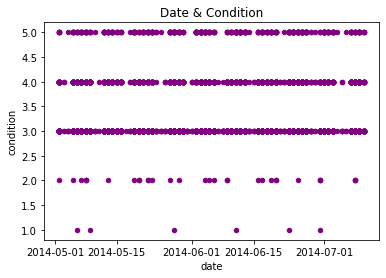

In [107]:
dc=df.plot(kind ='scatter', x='date', y='condition', color='purple')
dc.set_title('Date & Condition')

Looks like more homes with a better condition were sold then ones with a lower rating of 1 or 2.

### 1.6.3 Bedrooms Column<a id='1.6.3_Bedrooms_Column'></a>

In [39]:
df['bedrooms'].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

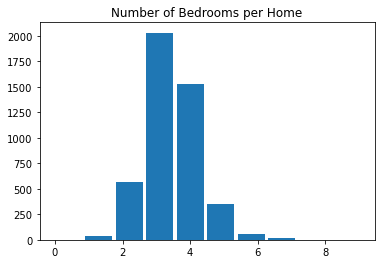

In [108]:
plt.hist(df['bedrooms'],width=.8)
plt.title('Number of Bedrooms per Home')
plt.show()

Here we have 10 unique value counts of bedrooms and most homes are three or four.

Text(0.5, 0.98, 'Bedrooms & Bathrooms per House')

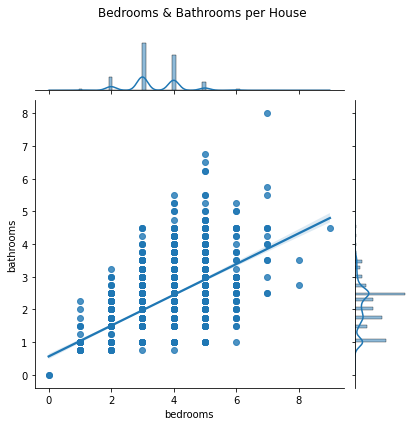

In [47]:
bb= sns.jointplot(x='bedrooms', y='bathrooms', data=df, kind='reg')
bb.fig.subplots_adjust(top=.9)
bb.fig.suptitle('Bedrooms & Bathrooms per House')

Bedrooms and bathrooms have a positive correlation. A few low and high outliers.

Text(0.5, 1.0, 'Bedrooms & Square Feet of Living')

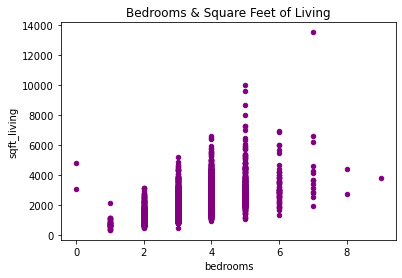

In [109]:
bs=df.plot(kind ='scatter', x='bedrooms', y='sqft_living', color='purple')
bs.set_title('Bedrooms & Square Feet of Living')

When a house has five bedrooms there area wide range of amounts of living space. The less amount of bedrooms the house has the  smaller living space typically is.

Text(0.5, 1.0, 'Bedrooms & Square Foot Lot')

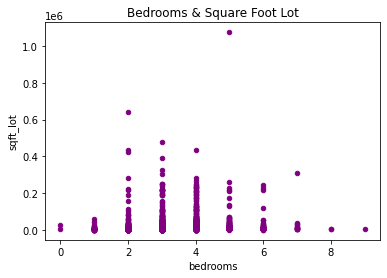

In [111]:
bsl=df.plot(kind ='scatter', x='bedrooms', y='sqft_lot', color='purple')
bsl.set_title('Bedrooms & Square Foot Lot')

When a home has 2-4 bedrooms the square lot is a wide range, This could be because ranches or farms typically have less bedrooms. The more bedrooms the house has the less square foot lot the property is.

### 1.6.4 Bathrooms Column<a id='1.6.4_Bathrooms_Column'></a>

In [110]:
df['bathrooms'].value_counts().head()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
Name: bathrooms, dtype: int64

A majority of the homes have either 2.5, 1 or 1.75 bathrooms.

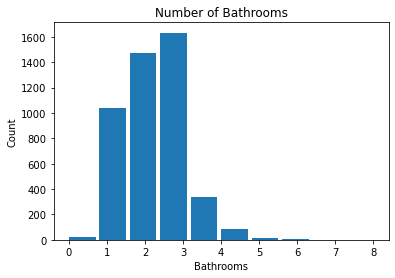

In [115]:
plt.hist(df['bathrooms'],width=.7)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Bathrooms and Square Feet of Living')

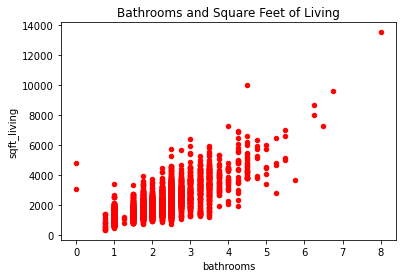

In [116]:
bsql=df.plot(kind ='scatter', x='bathrooms', y='sqft_living', color='red')
bsql.set_title('Bathrooms and Square Feet of Living')

Another positive correlation between variables. Two homes oddly do not have a bathroom and 3,000 and 4,500 square feet of living.

Text(0.5, 0.98, 'Bathrooms & Price')

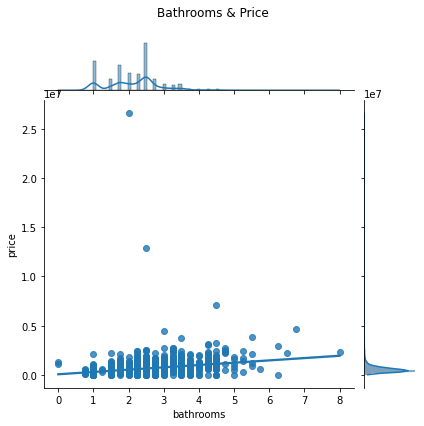

In [117]:
bp = sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
bp.fig.subplots_adjust(top=.9)
bp.fig.suptitle('Bathrooms & Price')

A few outilers but pretty evenly distributed. Most of the houses are 1-5 Bathrooms and less than .5 le7 in price.

In [118]:
bath_price_means = df.groupby(by='bathrooms')['price'].mean().sort_values(ascending=False)
bath_price_means.head()

bathrooms
6.75    4.668000e+06
8.00    2.280000e+06
6.50    2.238888e+06
5.50    2.028750e+06
4.75    1.934621e+06
Name: price, dtype: float64

There are some expensive house that have 6.75 bathrooms. This could be from a home builder that made mansions with certain dimensions like 6.75 bathrooms.

Text(0.5, 1.0, 'Bathrooms and Square feet Above')

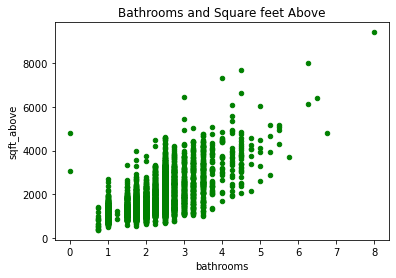

In [119]:
bsa=df.plot(kind ='scatter', x='bathrooms', y='sqft_above', color='green')
bsa.set_title('Bathrooms and Square feet Above')

As the number of bathrooms increase, typically the square feet of livng space above the basement increases as well.

Text(0.5, 1.0, 'Bathrooms and Bedrooms Boxplot')

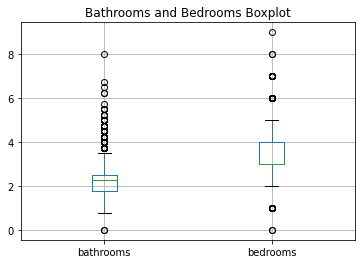

In [120]:
boxplot = df.boxplot(column=['bathrooms', 'bedrooms']) 
boxplot.set_title('Bathrooms and Bedrooms Boxplot')

Here we can see that there are some outliers with more bathrooms than usual from 3.75 to 8. Bedrooms have some low and high outliers. The low outliers are 0 and 1 and the high outliers are 6-9 bedrooms.

### 1.6.5 Bed/Bath % Column<a id='1.6.5_Bed/Bath_%_Column'></a>

In [53]:
df['bd/ba %'].value_counts().head()

2.000    694
1.600    577
1.200    499
1.714    394
1.333    369
Name: bd/ba %, dtype: int64

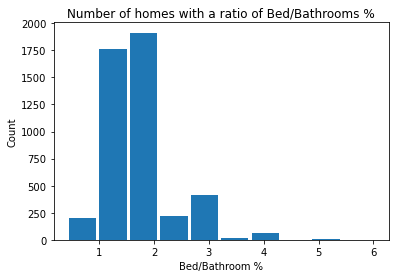

In [122]:
plt.hist(df['bd/ba %'],width=.5)
plt.title('Number of homes with a ratio of Bed/Bathrooms %')
plt.xlabel('Bed/Bathroom %')
plt.ylabel('Count')
plt.show()

Most of the homes ratio of bedrooms to bathrooms are 1-2%

Text(0.5, 1.0, 'Ratio of Bed to Bathroom & Square Living Space')

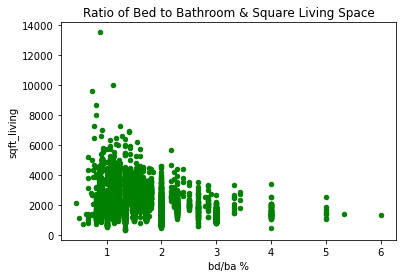

In [123]:
bbsl=df.plot(kind ='scatter', x='bd/ba %', y='sqft_living', color='green')
bbsl.set_title('Ratio of Bed to Bathroom & Square Living Space')

More range of values for homes with a bd/ba % between 1-2 and square living space from 1,000 to 14,000.

In [56]:
bd_ba_price_means = df.groupby(by='bd/ba %')['price'].mean().sort_values(ascending=False)
bd_ba_price_means.head()

bd/ba %
0.741    4668000.0
0.909    2362500.0
0.842    2300000.0
0.875    2280000.0
0.769    2238888.0
Name: price, dtype: float64

The bd/ba % of .741 has the highest average price of a home sold.

Text(0.5, 0.98, 'Bed/Bathroom % & Price')

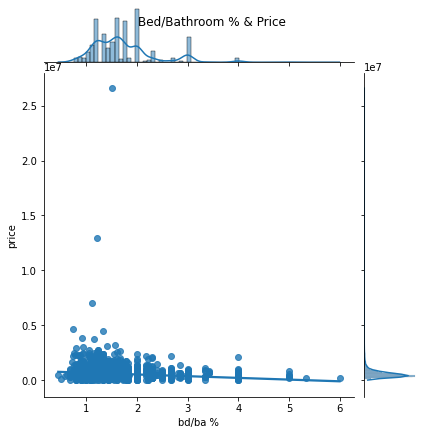

In [66]:
bbp = sns.jointplot(x='bd/ba %', y='price', data=df, kind='reg')
bbp.fig.subplots_adjust(top=1)
bbp.fig.suptitle('Bed/Bathroom % & Price')

Here is a graph representing this break down. A few outliers with a price and a bd/ba % between 1-2.

### 1.6.6 Year Built Column<a id='1.6.6_Year_Built_Column'></a>

In [58]:
df['yr_built'].value_counts().head()

2006    111
2005    104
2007     93
2004     92
1978     90
Name: yr_built, dtype: int64

Many homes were built from 2004-07.

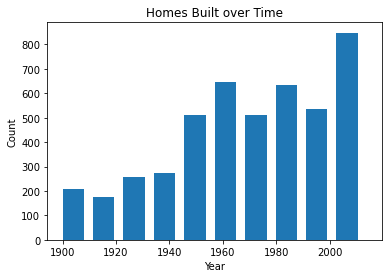

In [124]:
plt.hist(df['yr_built'], width=8)
plt.title('Homes Built over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

More homes were built over time possibly due to the increase in Washington population.

Text(0.5, 0.98, 'Condition vs. Year Built')

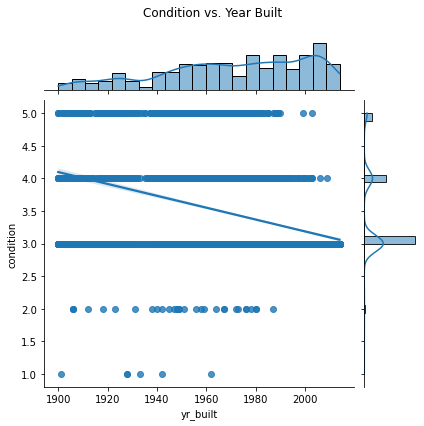

In [67]:
yc = sns.jointplot(x='yr_built', y='condition', data=df, kind='reg')
yc.fig.subplots_adjust(top=.9)
yc.fig.suptitle('Condition vs. Year Built')

The condition of the home at the time of sale was overall better the newer the house.

### 1.6.7 Age Column<a id='1.6.7_Age_Column'></a>

In [61]:
df['age'].value_counts().head()

8     111
9     104
7      93
10     92
36     90
Name: age, dtype: int64

7-10 years ago saw a lot of growth in the number of homes built.

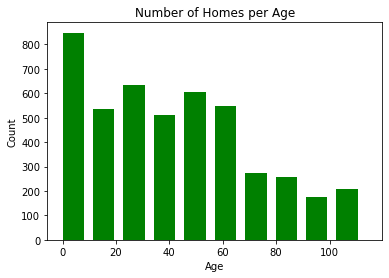

In [125]:
plt.hist(df['age'], color='green', width=8)
plt.title('Number of Homes per Age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Age & Square feet of Living Space')

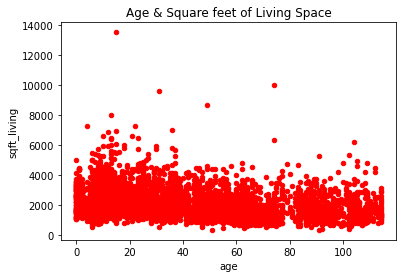

In [128]:
las = df.plot(kind ='scatter', x='age', y='sqft_living', color='red')
las.set_title('Age & Square feet of Living Space')

A few outliers throughout the years. Overall very consistant.

In [129]:
age_price_means = df.groupby(by='age')['price'].mean().sort_values(ascending=False)
age_price_means.head(8)

age
22     1.267580e+06
77     9.272188e+05
78     9.185000e+05
79     9.143333e+05
80     8.817500e+05
100    8.643600e+05
112    8.547250e+05
105    8.217545e+05
Name: price, dtype: float64

Homes 22 years ago are worth more than at any other year. Interesting the Victorian homes built from 77-80 years ago are worth a lot. This might be because they were built downtown that are expensive real estate spots today. 

### 1.6.8 Sqft Living Column<a id='1.6.8_Sqft_Living_Column'></a>

In [65]:
df['sqft_living'].value_counts().head(8)

1940    32
1720    32
1660    31
1840    31
2000    30
1410    29
1200    28
1480    28
Name: sqft_living, dtype: int64

Many values between 1200-2000 sqaure feet of living space in the homes.

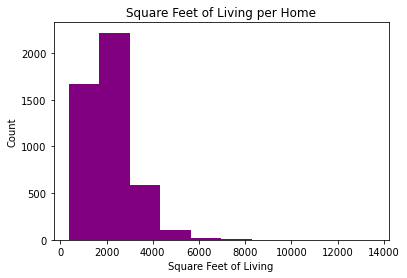

In [130]:
plt.hist(df['sqft_living'], color='purple')
plt.title('Square Feet of Living per Home')
plt.xlabel('Square Feet of Living')
plt.ylabel('Count')
plt.show()

In [131]:
living_price_means = df.groupby(by='price')['sqft_living'].mean().sort_values(ascending=False)
living_price_means.head()

price
2280000.0    13540.0
7062500.0    10040.0
4668000.0     9640.0
2888000.0     8670.0
1135250.0     7320.0
Name: sqft_living, dtype: float64

The greater the square feet of living the higher the price of the home.

Text(0, 0.5, 'Count')

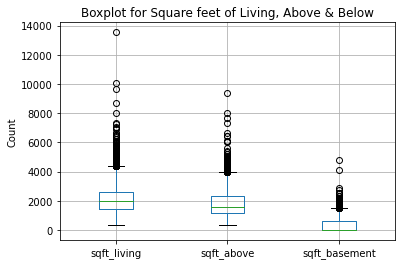

In [134]:
sqft_boxplot = df.boxplot(column=['sqft_living', 'sqft_above', 'sqft_basement']) 
sqft_boxplot.set_title('Boxplot for Square feet of Living, Above & Below')
sqft_boxplot.set_ylabel('Count')

Lots of outliers above the third quartile for each of the three categories.

### 1.6.9 T Test for Condition, View and Waterfront Columns<a id='1.6.9_T_Test_for_Condition,_View_and_Waterfront_Columns'></a>

In [75]:
stats.ttest_ind(df['price'], df['condition'])

Ttest_indResult(statistic=66.39484406598429, pvalue=0.0)

In [72]:
stats.ttest_ind(df['price'], df['view'])

Ttest_indResult(statistic=66.3952303254745, pvalue=0.0)

In [73]:
stats.ttest_ind(df['price'], df['waterfront'])

Ttest_indResult(statistic=66.39525841048108, pvalue=0.0)

We can reject the null hypothesis that there is no relationship or difference between the two variables since all of the p-values are under .05 for each t test. The large t score of 66.39.. for each one indicates that there is a large difference relative to the variation for each independent variable and the dependent variable of price.

### 2. Summary<a id='2._Summary'></a>

Here I did data wrangling and explored our dataset to prep it for the training and model phasis of our housing price prediction model. I loaded the data and immemdiately did some cleaning where I created the date column into pandas datetime. The most important column i created was 'Age'. This column will be useful in our model to predict the price. Luckily we had no null values and a very clean dataframe as well.
After the data wrangling stage I looked at the min, max, mean for each numeric column to get a sense of how the data is dispersed from each other. The correlation heat map was very useful to see which columns were relavent. More importantly i found out which columns had a positive or negivtive correlation with our Y variable of Price. There were a few variables that had a higher positive correlation: 
* Square feet of living and square feet above are related at .88. 
* Square living space and bathrooms had a high correlation at .76.
* Square living space above and bathrooms also have a high correlation at .69. 
* The biggest negivite correaltion was bed to bath ratio at -.66. 

Then I explored a few columns that potentially have a deep relationship with the Price column. This is what I found:

* Homes built in 1992 were the most expensive on average. 
* The price column also had a few rows where the sales price was $0. I will figure out what to do with those values in the next stage. 
* There were more homes sold in the June and July than at the start in April.
* A majority of the houses had three or four bedrooms. For bathrooms there was typically 1, 1.75 or 2.5 in each home.
* There were more properties built from 2004-07 then at anyother timeframe.
* The condition rating was higher for newer homes.
* The view of the home, if it was waterfront or its particular condition was correlated with the price.

The data is ready and prepared to go. In the next stage I will train different models to find one that predicts the price of a home accurately.